In [104]:
#Import statements
import pandas as pd
import numpy as np

import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [105]:
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [106]:
bank_data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [107]:
bank_data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [108]:
bank_data.shape

(5000, 14)

In [109]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [110]:
bank_data.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [111]:
# No columns have null data in the file

#The variable ID does not add any interesting information. We can neglect this information for our model prediction.
#Personal Loan - This is our target variable


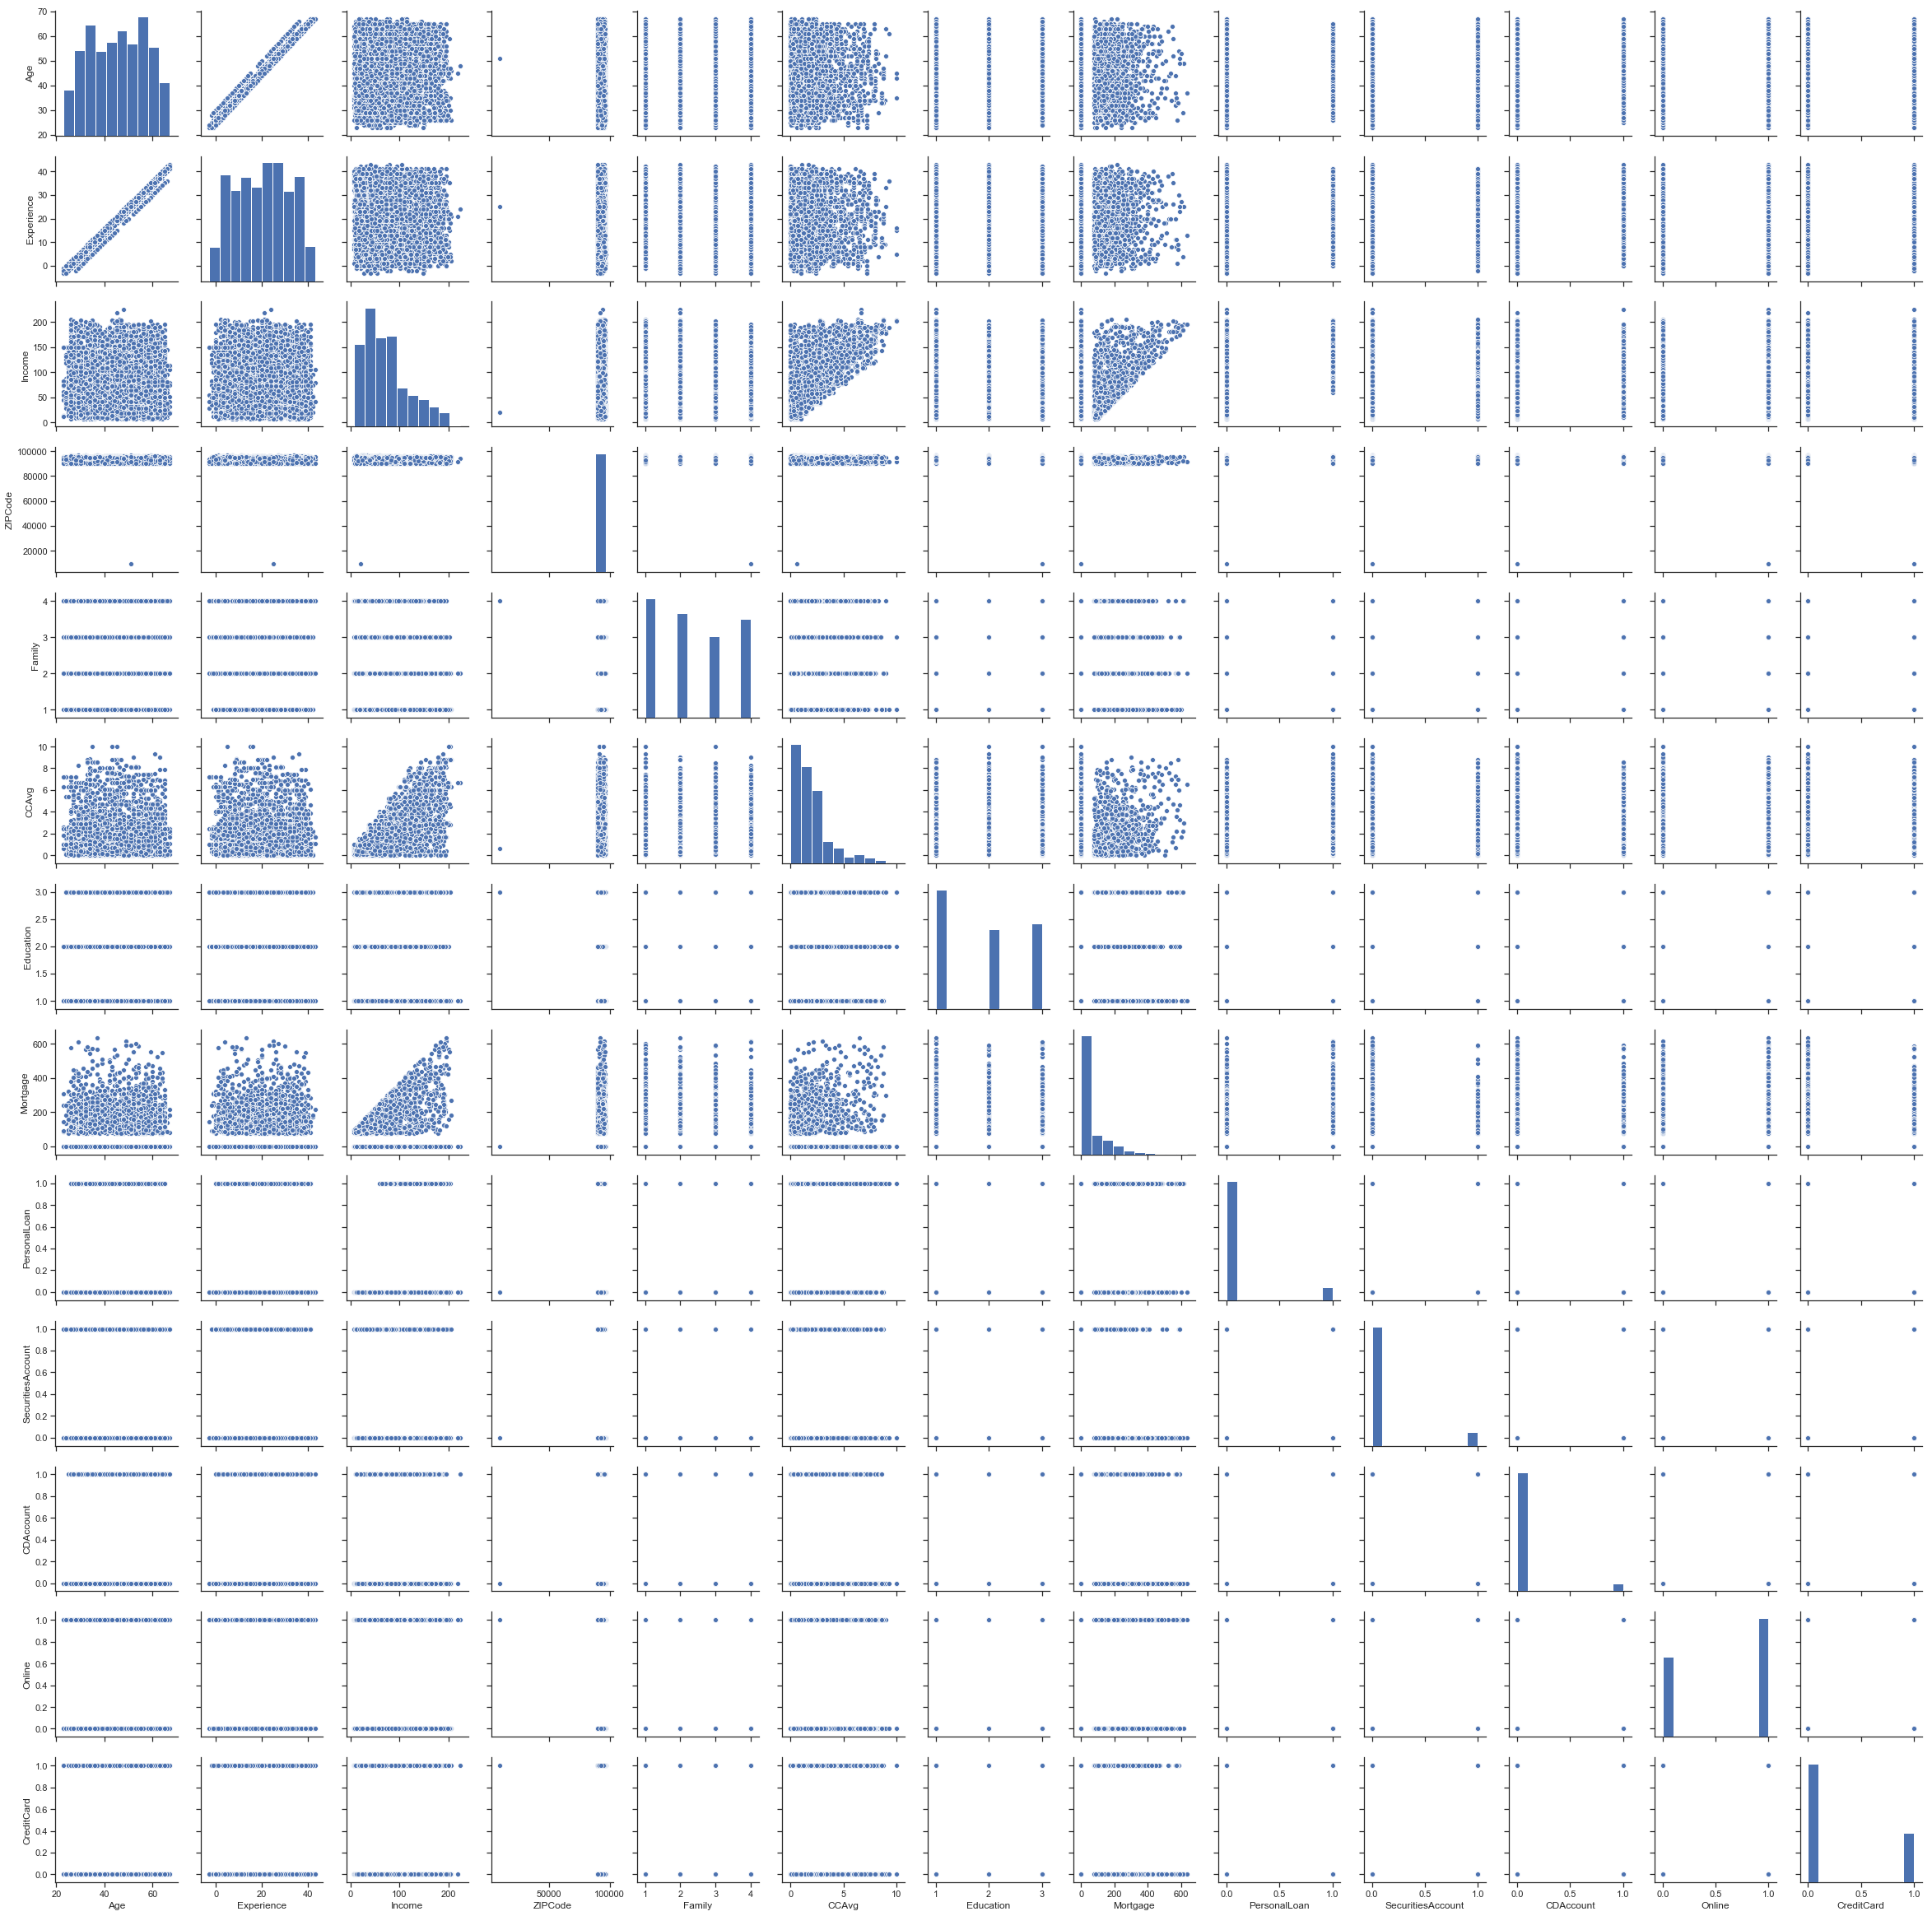

In [112]:
sns.pairplot(bank_data.iloc[:,1:])

In [113]:
###Observations ..
# Age feature seems normally distributed with majority of customers falling between 30 years and 60 years of age
# Income and CCAvg is positively skewed.
# From Experience graph, there seems to be few negative values. This could be false data input, since there cannot be negative experience logically.


In [114]:
#Finding how many -ve exp values exists
bank_data[bank_data['Experience'] < 0]['Experience'].count()

52

In [115]:
#clean the negative values from column
dfExp = bank_data.loc[bank_data['Experience'] >0]
negExp = bank_data.Experience < 0
column_name = 'Experience'
mylist = bank_data.loc[negExp]['ID'].tolist() # getting the customers who has negative experience

In [116]:
#instead of deleteing the records, trying to find similar records in data frame which has records with positive experience and take the median

for id in mylist:
    age = bank_data.loc[np.where(bank_data['ID']==id)]["Age"].tolist()[0]
    education = bank_data.loc[np.where(bank_data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    bank_data.loc[bank_data.loc[np.where(bank_data['ID']==id)].index, 'Experience'] = exp

In [117]:
# checking if there are records with negative experience
bank_data[bank_data['Experience'] < 0]['Experience'].count()

0

In [118]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


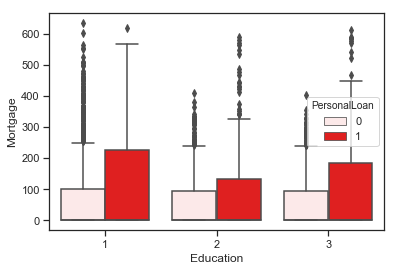

In [119]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=bank_data,color='red')

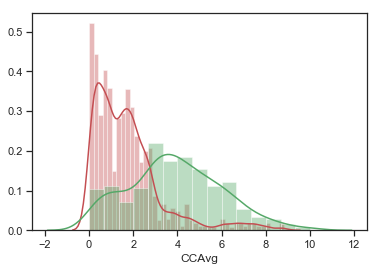

In [120]:
sns.distplot( bank_data[bank_data.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( bank_data[bank_data.PersonalLoan == 1]['CCAvg'], color = 'g')

In [121]:
#Finding correlations
corr = bank_data.corr()

In [122]:
corr

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.009308,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994159,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009308,0.994159,1.000000,-0.048095,-0.030649,-0.049420,-0.047694,0.013075,-0.012935,-0.011498,0.001059,0.007381,0.014501,0.007935
Income,-0.017695,-0.055269,-0.048095,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.030649,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.049420,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.047694,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013075,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.012935,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.011498,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [123]:
#Income and CCAvg is moderately correlated.
#Age and Experience is highly correlated

In [124]:
################################################
# ---- APPLYING MODELS

In [125]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bank_data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [126]:
train_set.columns

Index(['Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard'],
      dtype='object')

In [127]:
train_set.shape

(3500, 12)

In [128]:
# KNN

In [129]:
train_set_indep = bank_data.drop(labels= "PersonalLoan" , axis = 1).drop(['Experience' ,'ID'] , axis = 1)
train_set_dep = bank_data["PersonalLoan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [130]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


In [131]:
print('Confusion matrix of KNN model on test set:\n',metrics.confusion_matrix(Y_Test, predicted))

Confusion matrix of KNN model on test set:
 [[1359   14]
 [ 120    6]]


In [132]:
# Naive Bayes

In [133]:
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

In [134]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

In [137]:
# Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
logreg.fit(X_Train, Y_Train)

C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [139]:
y_pred = logreg.predict(X_Test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(Y_Test,y_pred)))


Accuracy of logistic regression classifier on test set: 0.91


In [140]:
print('Confusion matrix of logistic regression classifier on test set:\n',metrics.confusion_matrix(Y_Test, y_pred))

Confusion matrix of logistic regression classifier on test set:
 [[1328   45]
 [  93   33]]


In [142]:
###  CONCLUSION:
# Since, Logistic regression an KNN both gives out more accuracy almost similar, I prefer to go with either of them.
# If only one has to be choosen, i will go with Logistic reg, due to advantages over KNN model in performance and model building.